# Дискретные случайные процессы и временные ряды.
## Задание 3.3
### Стационарные процессы. Ветвящиеся процессы Гальтона-Ватсона.

Выполненную работу нужно отправить телеграм-боту  `@miptstats_ad21_bot`
* Дедлайн см. в телеграм-боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* По практическим задачам прислать нужно ноутбук.
* Теоретические задачи необходимо оформить в tex’е и прислать `pdf` или же прислать фотку в правильной ориентации рукописного решения, где все четко видно.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Не забывайте делать пояснения и выводы.
* При проверке могут быть запущены функции, которые отвечают за генерацию траекторий винеровского процесса.

------------------

### Задача 1 (2 балла)

Пусть $(X_t, t\geqslant 0)$ --- случайный процесс и $Y_t = X_{t+1} - X_t$. Является ли процесс $Y_t$ стационарным и в каком смысле, если 

a) $X_t = W_t$ &mdash; винеровский процесс;

б) $X_t = N_t$ &mdash; пуассоновский процесс?

### Задача 2 (2 балла)

Найдите производящую функцию числа частиц в $n$-м поколении ветвящегося процесса, если производящая функция числа потомков одной частицы равна $1-p(1-z)^{\alpha}$, $\alpha\in(0,1)$.

Найдите вероятность вырождения данного процесса

### Задача 3 (2 балла)

Пусть $(X_n,n\in{\mathbb Z}_{+})$ &mdash; ветвящийся процесс с законом размножения частиц $\xi$. Обозначим через $Y_n=X_n+\ldots+X_0$ &mdash; общее число частиц в процессе за время $n$, а через $\varphi_{Y_n}\;(z)$ &mdash; его производящую функцию. Докажите, что

$$ \large\varphi_{Y_n}(z)=z\varphi_{\xi}(\varphi_{Y_{n-1}}\;(z)).$$

### Задача 4. Исследование ветвящегося процесса (5 баллов)

<IMG SRC="https://www.wikitree.com/images/wikitree-logo.png">


В Британской империи в Викторианскую эпоху (1837—1901) было обращено внимание на вымирание аристократических фамилий. В связи с этим в своей статье в The Educational Times в 1873 году Гальтон поставил вопрос о вероятности вымирания фамилии. Решение этого вопроса нашел Ватсон и вместе в 1874 году они написали статью "On the probability of the extinction of families".
На сайте <a href="http://wikitree.com">wikitree.com</a> в свободно распространяемом формате собрано большое количество данных о родословных различных людей. В коллекции есть как люди, жившие во времена поздней античности, так и наши современники. На основе некоторой части этих данных вам предстоит провести исследование о вымирании фамилий.

Вам предоставляются несколько файлов, в которых содержатся данные о некоторых родословных. Вам предстоит проводить исследование на нескольких из этих файлов (выберете 5 любых файлов из предложенных). Формат файлов следующий:

`generation \t name \t gender \t birthday \t deathdate \t parents \t siblings \t spouses \t children`

Эти данные означают номер поколения, фамилию, пол, дату рождения, дату смерти, родителей, братьев и сестер, супруг, детей соответственно. Если какая-то характеристика неизвестна (кроме номера поколения и фамилии), вместо нее ставится пустая подстрока. Если каких-то характеристик несколько, то они разделены через ";". Все люди представлены некоторым идентификатором `<id>`, который соответствует адресу `http://www.wikitree.com/wiki/<id>`. Например, идентификатор `Romanov-29` соответствует адресу <a href="http://www.wikitree.com/wiki/Romanov-29">`http://www.wikitree.com/wiki/Romanov-29`</a>. В файле родословные отделяются друг от друга пустой строкой.

Для облегчения вашей работы мы предоставляем вам код, который считывает данные из этого файла и преобразует их в список ветвящихся процессов. Каждый ветвящийся процесс содержит список списков, в каждом из которых содержатся все люди из соответствующего поколения. Обратите внимание, что одни и те же родословные могут попасть в разные файлы. В таком случае их можно считать разными, но при желании вы можете удалить копии.

В предоставленных данных в каждой родословной для каждого мужчины на следующем поколении содержатся все его дети, которые были указаны на сайте. Для женщин дети в данной родословной не указаны. Это связано с тем, что женщины обычно меняют свою фамилию, когда выходят замуж, тем самым, они переходят в другую ветку. С точки зрения ветвящихся процессов, нужно иметь в виду, что если у мужчины родилось 3 мальчика и 4 девочки, то у него 3 потомка как продолжателя фамилии.

Ваша задача &mdash; исследовать процесс вымирания фамилий на основе предложенных данных. В данном задании вам предстоит сделать оценку закона размножения, а в следующем задании &mdash; провести остальной анализ.

In [214]:
import numpy as np
import scipy.stats as sps
from collections import Counter  # это может пригодиться
from BranchingProcess import Person, BranchingProcess, read_from_files
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 16})
%matplotlib inline

## 1. Описательный анализ

Большая часть кода, необходимая для проведения данного анализа, является технической и основывается на работе с пакетом `BranchingProcess`. Поэтому данный код полностью вам выдается, вам нужно только выполнить его, подставить имена файлов. Кроме того, код анализа позволит вам лучше понять структуру данных.

Считайте данные с помощью предложенного кода. Посчитайте количество родословных.

In [101]:
processes = read_from_files(files=['C.txt', 'E.txt', 'M.txt', 'T.txt', 'W.txt'])
print(len(processes))

24066


В имеющихся данных очень много людей, про которых известно лишь то, что они когда-то существовали. Обычно их фамилия неизвестна (вместо фамилии у них может стоять, к примеру, `B-290`), а у некоторых из них неизвестен даже пол, не говоря уже о родителях и детях. Такие данные стоит удалить.

Удалите все процессы, состоящие только из одного поколения (в котором, естественно, будет только один человек).
Сколько осталось процессов?

In [102]:
for i in range(len(processes))[::-1]:
    if len(processes[i].generations) < 2:
        del processes[i]

print(len(processes))

6804


Для лучшего понимания задачи и предложенных данных посчитайте следующие характеристики: минимальное, максимальное и среднее число поколений в роду, год рождения самого старого и самого молодого человека, среднюю продолжительность жизни.

In [103]:
generation_counts = []
years = []

for pedigree in processes:
    generation_counts.append(len(pedigree.generations))
    
    for generation in pedigree.generations:
        for person in generation:
            if person.birthday != '':
                years.append(person.birthday.split('-')[0])

years = np.array(years, dtype=int)
print('Минимальное число поколений в роду:', min(generation_counts))
print('Максимальное число поколений в роду:', max(generation_counts))
print('Среднее число поколений в роду:', round(np.mean(generation_counts), 1))
print('Год рождения самого старого:', min(years))
print('Год рождения самого молодого:', max(years))

Минимальное число поколений в роду: 2
Максимальное число поколений в роду: 81
Среднее число поколений в роду: 3.3
Год рождения самого старого: 1
Год рождения самого молодого: 2000


Постройте гистограмму зависимости количества поколений в родословной от количества родословных.
На следующем графике отложите на временной оси года рождения всех людей.

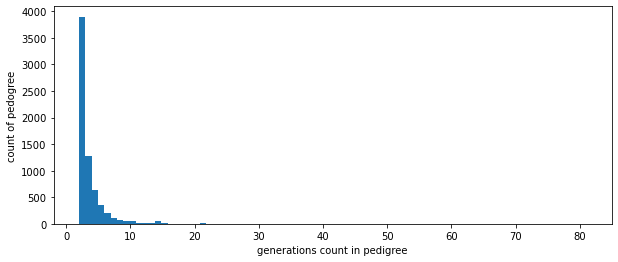

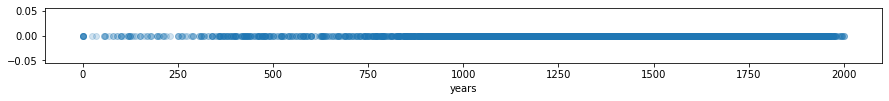

In [104]:
plt.figure(figsize=(10, 4))
plt.hist(generation_counts, bins=80)
plt.xlabel('generations count in pedigree')
plt.ylabel('count of pedogree')
plt.show()

plt.figure(figsize=(15, 1))
plt.scatter(years, np.zeros_like(years), alpha=0.2)
plt.xlabel('years')
plt.show()

Посчитайте среднюю продолжительность жизни.

In [105]:
ages = []
for pedigree in processes:
    for generation in pedigree.generations:
        for person in generation:
            if person.birthday != '' and person.deathdate != '':
                ages.append(int(person.deathdate.split('-')[0]) - \
                            int(person.birthday.split('-')[0]))

mean_age = np.mean(ages)
print(round(mean_age, 2))

57.72


## 2. Оценка закона размножения

Для начала предположим, что все выданные вам процессы являются частью одного большого процесса с общим предком. В следующем задании рассмотрим так же случай, когда все процессы являются разными.

Чтобы проводить какой-либо анализ ветвящегося процесса нужно некоторым образом оценить закон размножения. Кажется,  что для этого достаточно посчитать количество сыновей у каждого человека, получив тем самым выборку неотрицательных целых чисел. Однако, проблема в том, что данные неполные, в частности, некоторые поля могут быть не заполнены. Тем не менее обычно у человека указаны либо все дети, либо не указаны вообще. 
Таким образом, условно мы можем разделить выборку на две части: поле детей заполнено (в т.ч. если у человека на самом деле нет детей), поле детей незаполнено. Если бы первая часть выборки была бы полностью известна, что распределение можно оценить по ней. Нам же неизвестен размер выборки и количество нулевых элементов в ней. Количество положительных элементов известно.


**Математическая постановка задачи**

$\mathsf{P}_\theta$ &mdash; неизвестное распределение из некоторого класса распределений $\mathcal{P}$ на $\mathbb{Z}_+$.

$X_1, ..., X_n$ &mdash; выборка из распределения $\mathsf{P}_\theta$, причем $n$ и количество нулей в выборке неизвестны. 

$Y_1, ..., Y_s$ &mdash; положительная подвыборка, которая полностью нам известна. В нашей задаче $Y_j$ &mdash; количество сыновей у $j$-го человека среди тех, у кого есть хотя бы один сын.

Оценку параметра $\theta$ можно найти методом максимального правдоподобия:

$$\prod_{i=1}^s \mathsf{P}_\theta (Y_i \left| Y_i > 0 \right) \to \max_\theta$$ 

В качестве классов распределений $\mathcal{P}$ рассмотрите пуассоновское и геометрическое распределения. По желанию можете рассмотреть другие классы распределений, осмысленные в данной задаче

**Внимание!** Применение метода `fit` из `scipy.stats` является некорректным в данной задаче, поскольку рассматривается усеченная выборка. Задачу максимизации нужно решить явно, выписав все формулы (которые тоже нужно прислать вместе с кодом).

После оценки параметров проведите проверку принадлежности неизвестного распределения рассматриваемому семейству распределений $\mathcal{P}$ с помощью критерия хи-квадрат, взяв для для него то распределение из $\mathcal{P}$, которое соответствует оценке максимального правдоподобия. Постарайтесь учесть все особенности проверки гипотез, которые обсуждались на семинаре. Для каждого класса постройте также график частот и функции $\mathsf{P}_\theta (y \left| Y > 0 \right).$

Сделаем заготовку: выразим условную плотность ($y > 0$): 
$$P_{\theta}(y | Y > 0) = \frac{P_{\theta}(y, y > 0)}{P_{\theta}(y > 0)} = \frac{P_{\theta}(y)}{1 - P_{\theta}(0)}.$$

Сначала сформируем массив $Y, \ Y_j$  — количество сыновей у $j$-го человека среди тех, у кого есть хотя бы один сын.

In [218]:
men_arr = []
for pedigree in processes:
    for generation in pedigree.generations:
        for person in generation:
            if person.gender == 'male':
                men_arr.append(person.name)
                
Y = []
for pedigree in tqdm(processes):
    for generation in pedigree.generations:
        for person in generation:
            if person.children != ['']:
                k_men = 0
                for child in person.children:
                    if child in men_arr:
                        k_men += 1
                if k_men > 0:
                    Y.append(k_men)
len(Y), np.max(Y), np.min(Y)

100%|██████████| 6804/6804 [06:54<00:00, 16.41it/s]  


(23714, 18, 1)

Теперь напишем функцию поиска по сетке. ОМП некоторых из полученных позже условных распределений не считается в элементарных функциях, поэтому будем считать ОМП с помощью поиска по сетке.

In [428]:
def grid_search(f, Y, theta_left, theta_right, precision, iters_remained, grid_size):
    best_likelihood = -np.inf
    best_theta = None
    space = (theta_right - theta_left) / grid_size
    grid = np.linspace(theta_left, theta_right, grid_size + 1)
    if iters_remained <= 0 or (theta_right - theta_left) < precision:
        return (theta_left + theta_right) / 2
    for theta in grid:
#         print(theta)
        likelihood = f(Y, theta)
#         print(likelihood)
        if likelihood > best_likelihood:
            best_likelihood = likelihood
            best_theta = theta
    print(f'best_theta: {best_theta}')
    print(f'best_likelihood: {best_likelihood}')
    return grid_search(f, Y, max(best_theta - space, theta_left), min(best_theta + space, theta_right), precision, 
                       iters_remained - 1, grid_size)

$Pois(\theta):$ выпишем условную плотность по заготовке:
$$P_{\theta}(y | Y > 0) = \frac{P_{\theta}(y)}{1 - P_{\theta}(0)} = \frac{e^{-\theta}\frac{\theta^y}{y!}}{1 - e^{-\theta}} = \frac{\theta^y}{y!(e^\theta - 1)}.$$
Теперь выпишем лог функцию правдоподобия:
$$l_Y(\theta) = \left(\sum\limits_{i = 1}^{s}Y_i \right)\ln{\theta} - \prod\limits_{i = 1}^{s}Y_i! - n\ln{\left(e^{\theta} - 1 \right)}.$$
Отбросим константу и получим функцию, которую будем оптимизировать:
$$\widetilde{l_Y(\theta)} = \left(\sum\limits_{i = 1}^{s}Y_i \right)\ln{\theta} - n\ln{\left(e^{\theta} - 1 \right)}.$$

In [429]:
loglikelihood = lambda Y, theta: np.sum(Y) * np.log(theta) - len(Y) * np.log(np.exp(theta) - 1)

theta_best = grid_search(loglikelihood, Y, 0, 100, 1e-5, 5, 100)
theta_best

best_theta: 2.0
best_likelihood: -7970.669230008723
best_theta: 1.8399999999999999
best_likelihood: -7855.184040570315
best_theta: 1.8443999999999998
best_likelihood: -7855.094219958344
best_theta: 1.8442399999999999
best_likelihood: -7855.0940958692445
best_theta: 1.8442422399999998
best_likelihood: -7855.094095842793


1.8442422399999998

In [444]:
k = 12
bins = np.histogram(Y, bins=np.max(Y) - 2)[0]
bins[k] = np.sum(bins[k:])
bins = bins[:k + 1]
bins

array([16949,  2357,  1743,  1044,   724,   433,   226,   117,    62,
          21,    14,    13,    11], dtype=int64)

In [445]:
n = np.sum(bins)
n

23714

In [446]:
dencity = lambda y, theta: sps.poisson(theta).pmf(y) * np.exp(theta) / (np.exp(theta) - 1)

In [447]:
bin_grid = np.linspace(1, k, k)
p = dencity(bin_grid, theta_best)
p = np.append(p, sps.poisson(theta_best).sf(k)* np.exp(theta_best) / (np.exp(theta_best) - 1))
n * p

array([8.21563836e+03, 7.57581365e+03, 4.65721184e+03, 2.14725670e+03,
       7.92012301e+02, 2.43443757e+02, 6.41384656e+01, 1.47858584e+01,
       3.02985608e+00, 5.58778856e-01, 9.36839608e-02, 1.43979931e-02,
       2.34899491e-03])

In [448]:
k_0 = 7
p[k_0] = np.sum(p[k_0:])
bins_new = bins.copy()
bins_new[k_0] = np.sum(bins_new[k_0:])
p = p[:k_0 + 1]
bins_new = bins_new[:k_0 + 1]
n * p, bins_new, 

(array([8215.63836097, 7575.81364693, 4657.21184335, 2147.25670053,
         792.01230145,  243.44375682,   64.13846563,   18.48492432]),
 array([16949,  2357,  1743,  1044,   724,   433,   226,   238],
       dtype=int64))

In [450]:
chi, pval = sps.chisquare(bins_new, n * p, ddof=1)
chi, pval

(18437.968374224754, 0.0)

In [451]:
def build_plot(Y, f, theta_best):
    all_bins = np.histogram(Y, bins=np.max(Y), normed=True)[0]
    x = np.linspace(1, np.max(Y), np.max(Y))
    plt.figure(figsize=(15, 10))
    plt.plot(x, all_bins, label='График частот')
    plt.plot(x, f(x, theta_best), label='Распределение, соответствующее ОМП')
    plt.xlabel('количество поколений в роду')
    plt.ylabel('частота')
    plt.legend()
    plt.show()

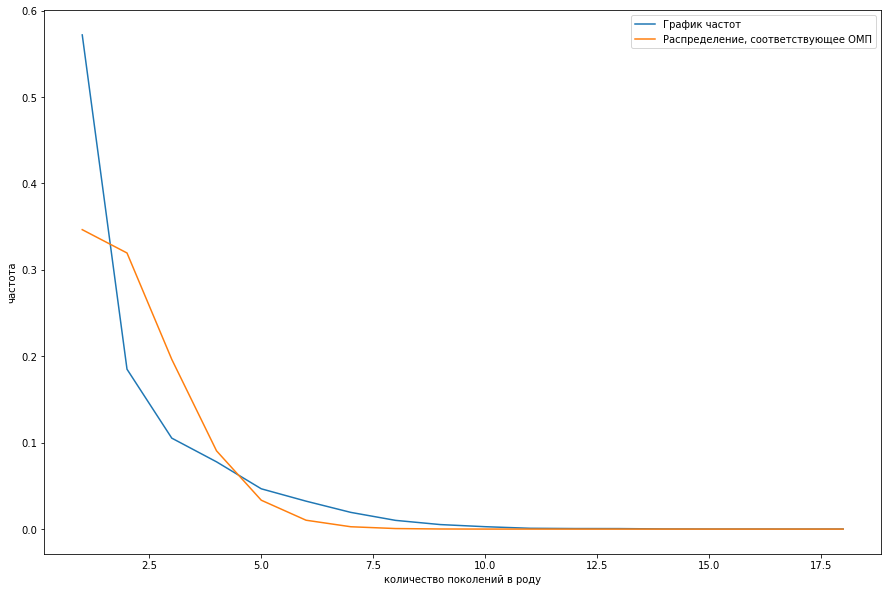

In [452]:
build_plot(Y, dencity, theta_best)

$Geom(\theta).$ Если расписать условную плотность геометрического распределения с носителем в $\mathbf{N_0},$ то получим геометрическое распределение с носителем в $\mathbf{N}.$ Для него ОМП изместна: $\widehat{\theta} = \frac{1}{\overline{Y}}.$

In [453]:
dencity_geom = lambda y, theta: sps.geom(theta).pmf(y)

In [454]:
theta_hat = 1 / (np.mean(Y))
theta_hat

0.45647738209817135

In [466]:
p_geom = sps.geom(theta_hat).pmf(bin_grid)
p_geom = np.append(p_geom, sps.geom(theta_hat).sf(k))
n * p_geom, bins

(array([10824.90463908,  5883.58050797,  3197.85908033,  1738.10873902,
          944.70141203,   513.4665846 ,   279.08070227,   151.6866739 ,
           82.4451381 ,    44.81079729,    24.35568186,    13.23786396,
           15.76217959]),
 array([16949,  2357,  1743,  1044,   724,   433,   226,   117,    62,
           21,    14,    13,    11], dtype=int64))

In [456]:
chi, pval = sps.chisquare(bins, n * p_geom, ddof=1)
chi, pval

(6623.305258001256, 0.0)

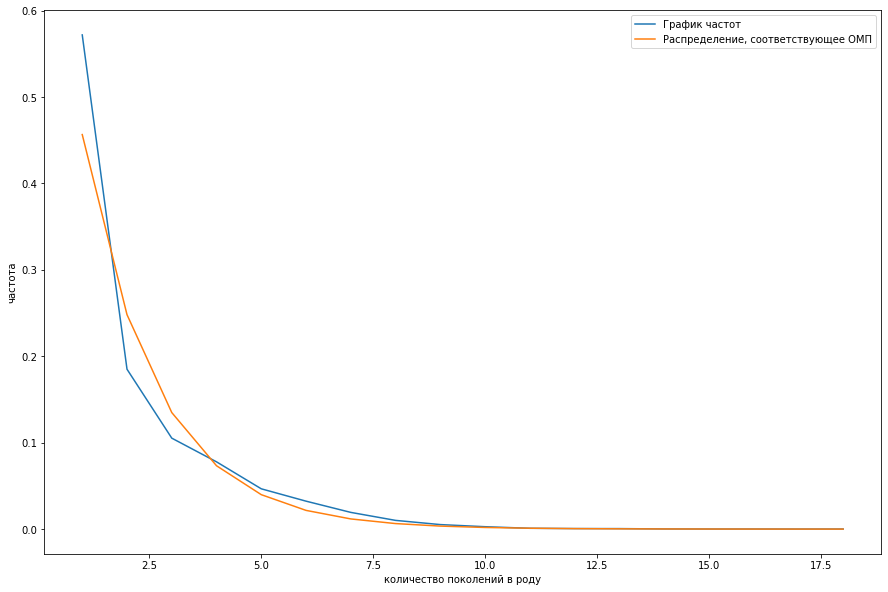

In [457]:
build_plot(Y, dencity_geom, theta_hat)

Рассмотрим "дискретное экспоненциальное распределение": пусть $P_{Exp \ discr}(y) = F_{Exp}(y) - F_{Exp}(y - 1), y \in \mathbb{N}.$

Выпишем плотность полученного распределения: 
$$P_{\theta}(y) = \theta\left(e^{-\theta(y - 1)} - e^{-\theta y}\right) = \theta e^{\theta y}(e^{\theta} - 1).$$
Запишем лог функцию правдоподобия:
$$l_{Y}(\theta) = n \ln{\theta} - \theta\sum\limits_{i = 1}^{s}Y_i + n\ln{(e^{\theta} - 1)}.$$
Поделим на $n$ и получим функцию, которую будем оптимизировать: 
$$\widetilde{l_{Y}(\theta)} = \ln{\theta} - \theta\overline{Y} + \ln{(e^{\theta} - 1)}.$$

In [458]:
loglikelihood_expon = lambda Y, theta: np.log(theta) - theta * np.mean(Y) + np.log(np.exp(theta) - 1)

theta_best_expon = grid_search(loglikelihood_expon, Y, 0, 100, 1e-5, 5, 100)
theta_best_expon

best_theta: 1.0
best_likelihood: -1.6493641898334004
best_theta: 1.26
best_likelihood: -1.6027485005529338
best_theta: 1.2592
best_likelihood: -1.602748027374903
best_theta: 1.259104
best_likelihood: -1.602748021505385
best_theta: 1.25910032
best_likelihood: -1.6027480214976149


1.25910032

In [459]:
dencity_expon = lambda y, theta: sps.expon(scale=1 / theta).cdf(y) - sps.expon(scale=1 / theta).cdf(y - 1)

In [460]:
p_exp = sps.expon(scale=1 / theta_best_expon).cdf(bin_grid) - sps.expon(scale=1 / theta_best_expon).cdf(bin_grid - 1)
p_exp = np.append(p_exp, sps.expon(scale=1 / theta_best_expon).sf(k))
n * p_exp, bins

(array([1.69813739e+04, 4.82117065e+03, 1.36877537e+03, 3.88608112e+02,
        1.10329472e+02, 3.13235676e+01, 8.89305337e+00, 2.52482090e+00,
        7.16820235e-01, 2.03511959e-01, 5.77789458e-02, 1.64039823e-02,
        6.50370692e-03]),
 array([16949,  2357,  1743,  1044,   724,   433,   226,   117,    62,
           21,    14,    13,    11], dtype=int64))

In [461]:
k_0 = 6
p_exp[k_0] = np.sum(p_exp[k_0:])
bins_new = bins.copy()
bins_new[k_0] = np.sum(bins_new[k_0:])
p_exp = p_exp[:k_0 + 1]
bins_new = bins_new[:k_0 + 1]
n * p_exp, bins_new, 

(array([1.69813739e+04, 4.82117065e+03, 1.36877537e+03, 3.88608112e+02,
        1.10329472e+02, 3.13235676e+01, 1.24188931e+01]),
 array([16949,  2357,  1743,  1044,   724,   433,   464], dtype=int64))

In [463]:
chi, pval = sps.chisquare(bins_new, n * p_exp, ddof=1)
chi, pval

(27451.97610087371, 0.0)

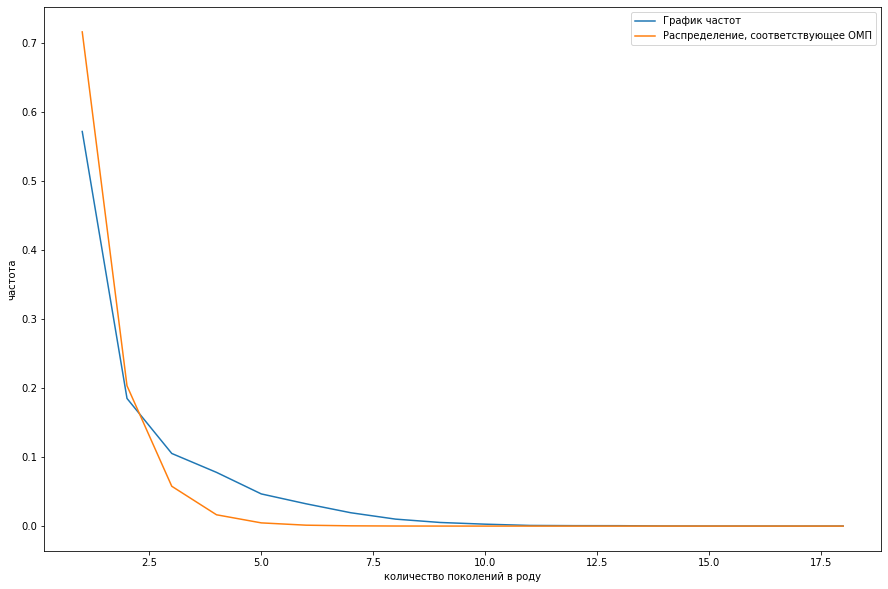

In [464]:
build_plot(Y, dencity_expon, theta_best_expon)

**Вывод:** на самом деле, мы выяснили только, что мы не нашли нужное распределение, которым можно приблизить рождение мальчиков при условии, что мальчиков хотя бы 1. Логично было бы предположить, что пуассоновское распределение должно было хорошо приближать нашу выборку, так как это число событий за фиксированное время, но оно показало себя совсем плохо. Видимо, дело в том, что на самом деле мы считаем число событий не за фиксированное время, а за разное (люди могут жить разное время). Геометрическое распределение звучит абсурдно из-за своего смысла (номер первого успеха, то есть, люди рожали мальчиков, пока им не понравится младенец?)))), но так оказалось, что среди рассмотренных распределений оно приближает рождение мальчиков лучше всего (хотя все равно pval критерия с таким распределением все еще остается нулем). "Дискретное экспоненциальное", на самом деле, я выбрал, исходя из того, что нам необходим больший наклон на первых элементах, чем наклон у, например, геометрического, то есть, смысла в это никакого не закладывалось. Однако, как ни странно, "дискретное экспоненциальное" распределение показало себя лучше, чем пуассоновское, хотя все равно pval критерия с таким распределением все еще остается нулем. В общем, можно сделать вывод, что из известных распределений рождение детей не описывает никакое из известных распределений.